# Percolado

Gerardo Hernandez Nava

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def llenado_matriz(matriz_, porcentaje_):
    for i in range(10):
        for j in range(0, 10):
            p = np.random.randint(100)
            if p > porcentaje_:
                matriz_[i, j] = 1 # el conducto se encuentra libre
            else:
                matriz_[i, j] = 0 # el conducto se encuentra bloqueado
    return matriz_

In [3]:
def analisis_renglon_0(cr0, matriz_ar0, ruta):
    if cr0 == 0: # analisis de primer columna
        if matriz_ar0[0, 1] == 1:
            ruta = np.vstack((ruta, [0, 1]))
            matriz_ar0[0, 1] = 0.5
        
        if matriz_ar0[1, 0] == 1:
            ruta = np.vstack((ruta, [1, 0]))
            matriz_ar0[1, 0] = 0.5
            
    elif cr0 == 9: # analisis de ultima columna
        if matriz_ar0[0, 8] == 1:
            ruta = np.vstack((ruta, [0,8]))
            matriz_ar0[0, 8] = 0.5
        
        if matriz_ar0[1, 9] == 1:
            ruta = np.vstack((ruta, [1, 9]))
            matriz_ar0[1, 9] = 0.5
            
    else: # analisis de las columnas centrales del renglon 0
        if matriz_ar0[0, cr0 + 1] == 1:
            ruta = np.vstack((ruta, [0, cr0 + 1]))
            matriz_ar0[0, cr0 + 1] = 0.5
            
        if matriz_ar0[0, cr0 - 1] == 1:
            ruta = np.vstack((ruta, [0, cr0 - 1]))
            matriz_ar0[0, cr0 -1] = 0.5
            
        if matriz_ar0[1, cr0] == 1:
            ruta = np.vstack((ruta, [1, cr0]))
            matriz_ar0[0, cr0] = 0.5
            
    return matriz_ar0, ruta

In [4]:
def analisis_renglones_centrales(rarc, carc, matriz_arc, ruta):
    if carc == 0: # analisis de la primera columna renglones centrales
        if matriz_arc[rarc, carc + 1] == 1:
            ruta = np.vstack((ruta, [rarc, carc + 1]))
            matriz_arc[rarc, carc + 1] = 0.5
            
        if matriz_arc[rarc + 1, carc] == 1:
            ruta = np.vstack((ruta, [rarc + 1, carc]))
            matriz_arc[rarc + 1, carc] = 0.5
            
        if matriz_arc[rarc - 1, carc] == 1:
            ruta = np.vstack((ruta, [rarc - 1, carc]))
            matriz_arc[rarc - 1, carc] = 0.5
        
    elif carc == 9: # analisis de la ultima columna renglones centrales
        if matriz_arc[rarc, carc - 1] == 1:
            ruta = np.vstack((ruta, [rarc, carc - 1]))
            matriz_arc[rarc, carc - 1] = 0.5
            
        if matriz_arc[rarc + 1, carc] == 1:
            ruta = np.vstack((ruta, [rarc + 1, carc]))
            matriz_arc[rarc + 1, carc] = 0.5
            
        if matriz_arc[rarc - 1, carc] == 1:
            ruta = np.vstack((ruta, [rarc - 1, carc]))
            matriz_arc[rarc - 1, carc] = 0.5
         
    else: # analisis de columnas centrales y renglones centrales
        if matriz_arc[rarc, carc + 1] == 1:
            ruta = np.vstack((ruta, [rarc, carc + 1]))
            matriz_arc[rarc, carc + 1] = 0.5
            
        if matriz_arc[rarc, carc - 1] == 1:
            ruta = np.vstack((ruta, [rarc, carc - 1]))
            matriz_arc[rarc, carc - 1] = 0.5
        
        if matriz_arc[rarc + 1, carc] == 1:
            ruta = np.vstack((ruta, [rarc + 1, carc]))
            matriz_arc[rarc + 1, carc] = 0.5
        
        if matriz_arc[rarc - 1, carc] == 1:
            ruta = np.vstack((ruta, [rarc - 1, carc]))
            matriz_arc[rarc - 1, carc] = 0.5
            
    return matriz_arc, ruta

In [5]:
def analisis_renglon_9(cr9, matriz_ar9, ruta):
    if cr9 == 0: # analisis de primer columna
        if matriz_ar9[9, 1] == 1:
            ruta = np.vstack((ruta, [9, 1]))
            matriz_ar9[9, 1] = 0.5
        
        if matriz_ar9[8, 0] == 1:
            ruta = np.vstack((ruta, [8, 0]))
            matriz_ar9[8, 0] = 0.5
            
    elif cr9 == 9: # analisis de ultima columna
        if matriz_ar9[9, 8] == 1:
            ruta = np.vstack((ruta, [9,8]))
            matriz_ar9[9, 8] = 0.5
        
        if matriz_ar9[8, 9] == 1:
            ruta = np.vstack((ruta, [8, 9]))
            matriz_ar9[8, 9] = 0.5
            
    else: # analisis de las columnas centrales del renglon 9
        if matriz_ar9[9, cr9 + 1] == 1:
            ruta = np.vstack((ruta, [9, cr9 + 1]))
            matriz_ar9[9, cr9 + 1] = 0.5
            
        if matriz_ar9[9, cr9 - 1] == 1:
            ruta = np.vstack((ruta, [0, cr9 - 1]))
            matriz_ar9[9, cr9 - 1] = 0.5
            
        if matriz_ar9[8, cr9] == 1:
            ruta = np.vstack((ruta, [1, cr9]))
            matriz_ar9[8, cr9] = 0.5
            
    return matriz_ar9, ruta

In [6]:
def analisis_vecinos(r_av, c_av, matriz_av, ruta):
    if r_av < 1:
        matriz_ruta_av, ruta = analisis_renglon_0(c_av, matriz_av, ruta)
        
    elif r_av > 8:
        matriz_ruta_av, ruta = analisis_renglon_9(c_av, matriz_av, ruta)
        
    else:
        matriz_ruta_av, ruta = analisis_renglones_centrales(r_av, 
                                                               c_av, 
                                                               matriz_av, 
                                                               ruta)
    
    return matriz_ruta_av, ruta

In [7]:
def analisis_percolacion(matriz_analizar):
    posibilidades = []
    matrices = []
    for inicio in range(10):
        Recorrido = True
        ruta = np.array([0, inicio])
        ruta = np.expand_dims(ruta, axis=0)
        i = 0
        matriz_ruta_ap = matriz_analizar.copy()
        if matriz_ruta_ap[ruta[i, 0], ruta[i, 1]] == 1:
            while Recorrido:
                if len(ruta) > i:
                    matriz_ruta_ap, ruta = analisis_vecinos(ruta[i, 0], ruta[i, 1],
                                                     matriz_ruta_ap, ruta)
                else: Recorrido = False
                i += 1
            if 9 in ruta[:,0]:
                posibilidades.append(inicio)
        matrices.append(matriz_ruta_ap)
    return posibilidades, matrices

## Esta sección es para correr el análisis de percolación de forma automatizada.

In [12]:
probabilidades = np.zeros((100, 100, 2))

In [13]:
for i in range(100):
    for j in range (100):
        M = np.zeros((10, 10))
        porcentaje = i
        M_bloqueada = llenado_matriz(M, porcentaje)
        opciones_i, opciones_m = analisis_percolacion(M_bloqueada)
        if len(opciones_i) > 0:
            probabilidades[i, j, 0] = 1
            probabilidades[i, j, 1] = len(opciones_i)

In [14]:
porcentajes = np.zeros((100,2))
for i in range(100):
    porcentajes[i, 0] = i
    porcentajes[i, 1] = np.sum(probabilidades[i, :, 0])

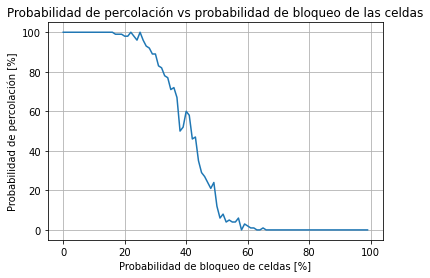

In [21]:
plt.plot(porcentajes[:, 0], porcentajes[:, 1])
plt.xlabel('Probabilidad de bloqueo de celdas [%]')
plt.ylabel('Probabilidad de percolación [%]')
plt.title('Probabilidad de percolación vs probabilidad de bloqueo de las celdas')
plt.grid()

In [16]:
num_opciones = np.zeros((100,2))
for i in range(100):
    num_opciones[i, 0] = i
    num_opciones[i, 1] = np.sum(probabilidades[i, :, 1])/100

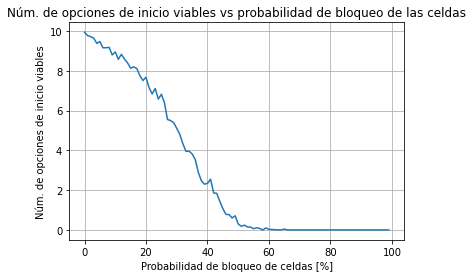

In [23]:
plt.plot(num_opciones[:, 0], num_opciones[:, 1])
plt.xlabel('Probabilidad de bloqueo de celdas [%]')
plt.ylabel('Núm. de opciones de inicio viables')
plt.title('Núm. de opciones de inicio viables vs probabilidad de bloqueo de las celdas')
plt.grid()

## En caso que se quiera probar con un porcentaje en especial se debe correr esta sección.

In [8]:
probabilidades = np.zeros((100, 2))

In [9]:
for j in range (100):
    M = np.zeros((10, 10))
    porcentaje = 35
    M_bloqueada = llenado_matriz(M, porcentaje)
    opciones_i, opciones_m = analisis_percolacion(M_bloqueada)
    if len(opciones_i) > 0:
        probabilidades[j, 0] = 1
        probabilidades[j, 1] = len(opciones_i)

In [12]:
probabilidad_percolado = np.sum(probabilidades[:, 0])
probabilidad_percolado

79.0

In [13]:
promedio_opciones = np.sum(probabilidades[:, 1])/100
promedio_opciones

4.33

## Si solo se busca hacer una iteración se deben corrar las celdas siguientes.

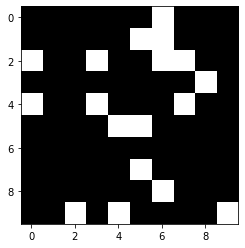

In [45]:
M = np.zeros((10, 10))
porcentaje = 80
M_bloqueada = llenado_matriz(M, porcentaje)
plt.imshow(M_bloqueada, cmap='gray')

In [47]:
opciones_i, opciones_m = analisis_percolacion(M_bloqueada)

In [10]:
print(opciones_i)

[5, 6]


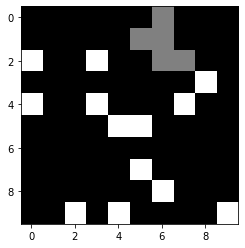

In [48]:
plt.imshow(opciones_m[6], cmap='gray')